In [1]:
from collections import deque

import tqdm
import torch

from utils_env import MyEnv
from utils_drl import Agent

In [2]:
models = []
model_dir = "models/"
for i in range(500):
    models.append(model_dir + f"model_{i:03d}")

In [3]:
device = torch.device("cuda:0")
env = MyEnv(device)
model_paths = tqdm.notebook.tqdm(models)
avg_rewards = []
for model_path in model_paths:
    agent = Agent(env.get_action_dim(), device, 0.99, 0, 0, 0, 1, model_path)
    obs_queue = deque(maxlen=5)
    avg_reward, _ = env.evaluate(obs_queue, agent)
    avg_rewards.append(avg_reward)

In [10]:
with open("DQN-result.txt", "w") as res:
    for avg_reward in avg_rewards:
        res.write(str(avg_reward) + "\n")

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [6]:
avg_rewards = np.array(avg_rewards)
accu_rewards = []
for i in range(49, 500):
    accu_rewards.append(np.mean(avg_rewards[i-49:i]))

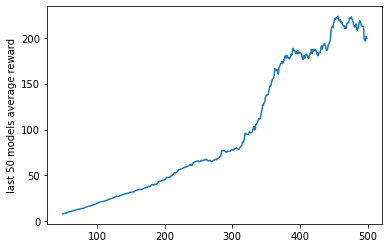

In [9]:
plt.plot(range(49, 500), accu_rewards)
plt.ylabel("last 50 models average reward")
plt.savefig("DQN-result.jpg")
plt.show()

In [ ]:
with open()